***RFM Analizi Nədir?***
RFM analizi müştəri davranışlarını qiymətləndirmək və seqmentləşdirmək üçün istifadə olunan güclü bir marketinq metodudur. RFM (Recency, Frequency, Monetary) üç əsas parametr əsasında müştəriləri qruplaşdırır:

Recency (Son alış-veriş tarixi): Müştəri sonuncu dəfə nə vaxt alış-veriş edib?
Frequency (Alış-veriş tezliyi): Müştəri nə qədər tez-tez alış-veriş edir?
Monetary (Pul sərfiyyatı): Müştəri nə qədər pul xərcləyir?
Bu üç kriteriya əsasında şirkətlər müştəriləri daha dəqiq seqmentlərə bölərək, hədəfli marketinq strategiyaları yarada bilirlər.

Bu proyektdə RFM analizin aparılması yolu ilə tanış ola bilərsiniz.

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/solma/OneDrive/Masaüstü/online_retail_II.csv")
data.sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
459354,532901,21754,HOME BUILDING BLOCK WORD,6,2010-11-15 11:39:00,5.95,15218.0,United Kingdom
286739,517313,22227,"DECORATION, HANGING HEART+MIRROR",24,2010-07-28 10:55:00,0.65,13126.0,United Kingdom
889075,568567,82494L,WOODEN FRAME ANTIQUE WHITE,1,2011-09-27 18:41:00,7.46,NaN,United Kingdom
202065,508854,82580,BATHROOM METAL SIGN,1,2010-05-18 15:13:00,1.28,NaN,United Kingdom
968733,574700,22292,HANGING CHICK YELLOW DECORATION,4,2011-11-06 13:53:00,1.45,16033.0,United Kingdom


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [98]:
data.isnull().sum()  #Null dəyərlər yoxlanılır.

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [99]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])  

In [100]:
data.dropna(inplace=True) 

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [102]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,824364.0,12.414574,-80995.0,2.0,5.0,12.0,80995.0,188.976099
InvoiceDate,824364,2011-01-01 22:29:28.042054144,2009-12-01 07:45:00,2010-07-06 11:58:00,2010-12-03 14:26:00,2011-07-27 15:14:00,2011-12-09 12:50:00,NaN
Price,824364.0,3.6768,0.0,1.25,1.95,3.75,38970.0,70.241388
Customer ID,824364.0,15324.638504,12346.0,13975.0,15255.0,16797.0,18287.0,1697.46445


In [103]:
data["Invoice"].nunique() 

44876

In [104]:
data = data[~data["Invoice"].str.contains("C", na=False)] 
#İnvoice də C olan dəyərlər silinir. Bu geri qaytarma,ləğv və s. kimi prosesləri göstərir.

In [105]:
data["TotalPrice"] = data["Quantity"] * data["Price"] #Ümumi dəyər hissəsini tapırıq

In [106]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,805620.0,13.307665,1.0,2.0,5.0,12.0,80995.0,144.306739
InvoiceDate,805620,2011-01-02 10:26:35.704326144,2009-12-01 07:45:00,2010-07-07 12:08:00,2010-12-03 15:10:00,2011-07-28 13:28:00,2011-12-09 12:50:00,NaN
Price,805620.0,3.206279,0.0,1.25,1.95,3.75,10953.5,29.197901
Customer ID,805620.0,15331.85625,12346.0,13982.0,15271.0,16805.0,18287.0,1696.768395
TotalPrice,805620.0,22.024564,0.0,4.95,11.85,19.5,168469.6,224.03215


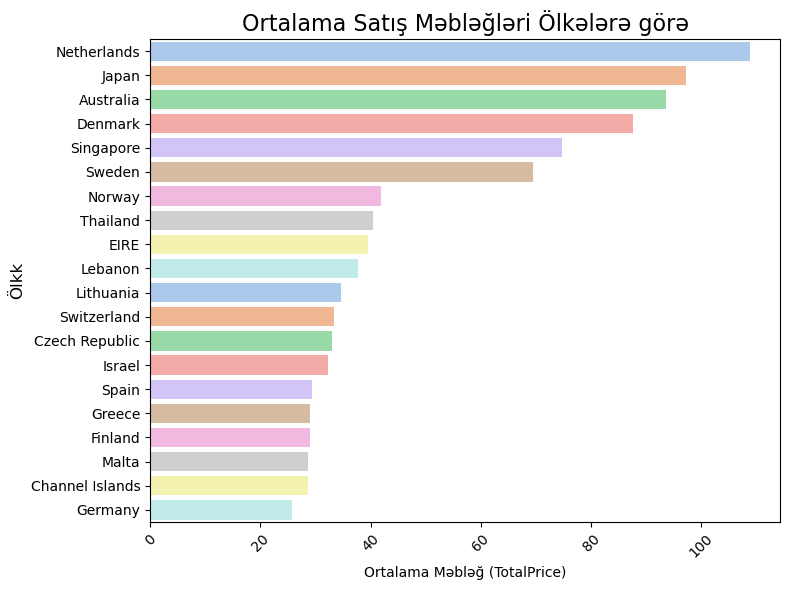

In [107]:
sorted_data = data.groupby("Country").agg({"TotalPrice": "mean"}).sort_values("TotalPrice", ascending=False).reset_index().head(20)

plt.figure(figsize=(8, 6))  # Şəkil ölçüsü
sns.barplot(x="TotalPrice", y="Country", data=sorted_data, palette="pastel")  


plt.title("Ortalama Satış Məbləğləri Ölkələrə görə", fontsize=16) 
plt.xlabel("Ortalama Məbləğ (TotalPrice)", fontsize=10)  
plt.ylabel("Ölkk", fontsize=12)
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [108]:
data["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [109]:
snapshot_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)

rfm = data.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  
    'Invoice': 'count', 
    'TotalPrice': 'sum'  
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'TotalPrice': 'Monetary'})

rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,34,77556.46
12347.0,2,253,5633.32
12348.0,75,51,2019.40
12349.0,19,175,4428.69
12350.0,310,17,334.40


In [110]:
rfm = rfm[((rfm["Monetary"] > 0) & (rfm["Frequency"] > 0))]

In [111]:
rfm["R"] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]) 
rfm['F'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4]) 
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4]) 
rfm['RFMScore'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)


def rfm_segment(rfm):
    r = int(rfm['R'])
    f = int(rfm['F'])
    m = int(rfm['M'])

    if r == 5 and f == 4 and m >= 4:
        return 'Best Customers'
    elif r == 5 and f >= 2:
        return 'Loyal Customers'
    elif r < 4 and f == 4 and m >= 3:
        return 'High Value Frequency Customers'
    elif r == 1:
        return 'At Risk Customers'
    else:
        return 'Other'
rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

rfm.head(15)

,Recency,Frequency,Monetary,R,F,M,RFMScore,Segment
Customer ID,,,,,,,,
12346.0,326,34,77556.46,2,2,4,224,Other
12347.0,2,253,5633.32,5,4,4,544,Best Customers
12348.0,75,51,2019.40,3,2,3,323,Other
12349.0,19,175,4428.69,5,4,4,544,Best Customers
12350.0,310,17,334.40,2,1,1,211,Other
12351.0,375,21,300.93,2,1,1,211,Other
12352.0,36,103,2849.84,4,3,4,434,Other
12353.0,204,24,406.76,2,2,2,222,Other
12354.0,232,58,1079.40,2,3,3,233,Other


In [136]:
segment_counts = rfm['Segment'].value_counts()
segment_counts

Segment
Other                             3290
At Risk Customers                 1136
Loyal Customers                    553
Best Customers                     526
High Value Frequency Customers     373
Name: count, dtype: int64

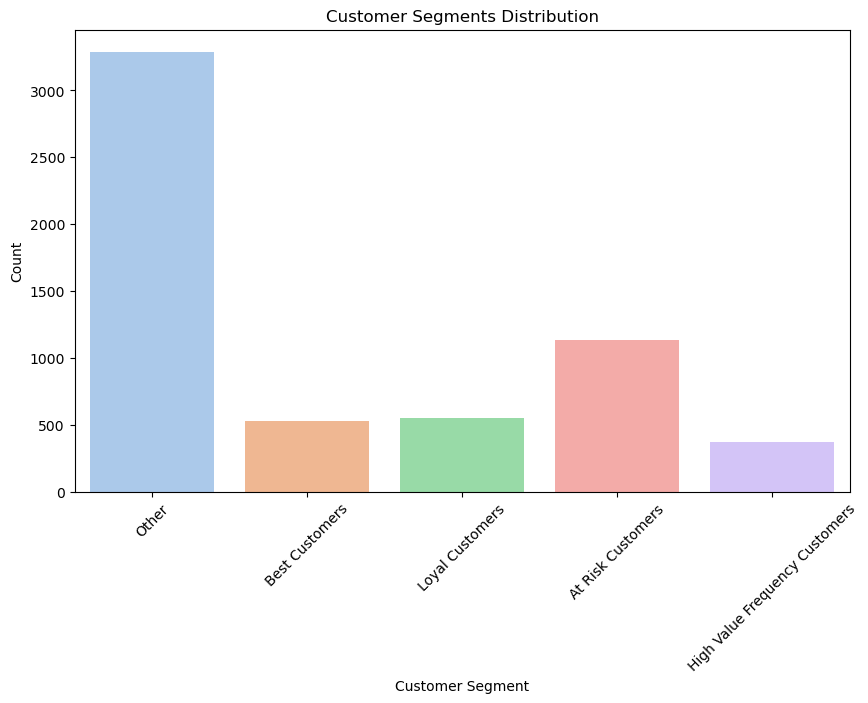

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Segment', palette='pastel')
plt.title('Customer Segments Distribution')
plt.xticks(rotation=45)
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

# 1. Best Customers
- **Xüsusiyyətlər**: Bu müştərilər ən yaxşı müştərilərdir. Onlar son zamanlarda alış-veriş ediblər (R = 5), tez-tez alış edirlər (F = 4), və yüksək məbləğdə pul xərcləyiblər (M >= 4).
- **Kampaniya Strategiyası**:
  - **Sadiqlik Proqramları**: Bu müştərilərə xüsusi mükafatlar, endirimlər və ya sadiqlik proqramları təklif edin.
  - **Eksklüziv Təkliflər**: Onlara eksklüziv məhsullar və ya xidmətlər təklif edin.

# 2. Loyal Customers
- **Xüsusiyyətlər**: Bu müştərilər mütəmadi olaraq alış-veriş edirlər (R = 5), alış-veriş frekansı yüksəkdir (F >= 2).
- **Kampaniya Strategiyası**:
  - **Sadiqlik Endirimləri**: Onlara xüsusi endirimlər təqdim edin ki, alış-verişlərini artırmağa təşviq olunsunlar.
  - **Yeni Məhsul Tanıtımları**: Yeni məhsulları tanıtmaq üçün onlara mütəmadi e-poçt göndərin.

# 3. High Value Frequency Customers
- **Xüsusiyyətlər**: Bu müştərilər son zamanlarda yüksək alış-veriş frekansına malikdirlər (F = 4), amma recency (R < 4) və monetar dəyəri (M >= 3) aşağıdır.
- **Kampaniya Strategiyası**:
  - **Çarpaz Satış**: Onlara əlavə məhsul təklifləri edərək çarpaz satış imkanlarından istifadə edin.
  - **Yenidən Cəlb Edici Təkliflər**: Alış-verişlərini artırmaq üçün endirimli təkliflər göndərin.

# 4. At Risk Customers
- **Xüsusiyyətlər**: Bu müştərilər son zamanlarda az alış-veriş ediblər (R = 1).
- **Kampaniya Strategiyası**:
  - **Xüsusi Endirimlər**: Bu müştəriləri geri cəlb etmək üçün onlara xüsusi endirimlər təqdim edin.
  - **Məmnuniyyət Anketləri**: Məmnuniyyətlərini ölçmək üçün onlara sual anketləri göndərin.

# 5. Other
- **Xüsusiyyətlər**: Bu müştərilər hər hansı bir xüsusi seqmentə daxil deyil.
- **Kampaniya Strategiyası**:
  - **Ümumi Endirimlər**: Bu seqmentə daxil olan müştərilər üçün ümumi endirimlər və kampaniyalar təqdim edin.
